<a href="https://colab.research.google.com/github/EricBojs/ME1316-Kompendium/blob/master/Appendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Appendix


## 1 Att använda Python-biblioteken

In [ ]:
!pip install -q yfinance
!pip install -q pandas
!pip install -q matplotlib
!pip install -q numpy

### 1.1 Numpy

Räkna matte är ju roligt. Python är vanligtvis ingen höjdare på matte, utan ofta kommer språk som *Matlab* och *R* och stjäl rampljuset. Som tur är det några som har tagit det roliga till Python och byggt biblioteket *Numpy* som underlättar vektorberäkningar och annat skoj.

In [ ]:
import numpy as np
X = np.arange(5,24,2) # skapar en vektor
print(X)              # Skriv ut X
print(type(X))        # Vilken datatyp är X?

[ 5  7  9 11 13 15 17 19 21 23]
<class 'numpy.ndarray'>


Även om `X` ser ut som en lista så är den av typen array!

Med hjälp av funktioner från Numpy kan vi utföra räkneoperationer, både snabbt och enkelt. 

In [ ]:
Y = np.round(np.sqrt(X),1)  # elementvis sqrt, sedan avrunda till 1 decimal
print(Y)
print("Y Medelvärde:", np.mean(Y))
print("Y Standardavvikelse:", np.std(Y))

[2.2 2.6 3.  3.3 3.6 3.9 4.1 4.4 4.6 4.8]
Y Medelvärde: 3.65
Y Standardavvikelse: 0.8249242389456136


Vad som annars hade tagit en `for`-loop kan Numpy göra på en rad.

Det går även bra att generera datamängder på mer avancerade vis. 
$$Z \sim N(5,1)$$

In [ ]:
Z = np.random.normal(5,1,size=10) # normalfördelad population med 10 element
print(Z)

[5.05086083 5.98636686 4.31010128 4.66605669 4.03035051 4.23183992
 4.68948421 5.0036153  4.4581997  5.04198728]


För vidare läsning om Numpy och alla dess dolda möjligheter rekommenderar vi:

* [Stack Absure Numpy Intro](https://stackabuse.com/numpy-tutorial-a-simple-example-based-guide/)
* *Diverse guider på Youtube...*

### 1.2 Pandas
Python har inga förinstallerade verktyg för att kunna läsa in Excel-filer - men som tur kan vi förlita oss på tredjepartsverktyg som löser biffen! 

Pandas är ett bibliotek som ger en ny datatyp till python: DataFrame. När vi läser in `.csv`-filer så konverteras dessa till objekt av dataframe-typen som sedan kan hanteras i Python. Pandas använder sig av Numpy för att hålla ordning på data i kolumner och rader, så det är väldigt behändigt att nyttja funktioner från det ena och använda hos det andra.


Vi hämtar hem `Ericsson aktie`-data m.h.a yfinance-biblioteket.

In [ ]:
import pandas as pd
import yfinance as yf
ericsson_df = yf.download('ERIC','2020-01-01','2020-07-01') #Ericsson-aktiedata
ericsson_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,8.96,9.03,8.94,9.01,8.923130,5368000
2020-01-03,8.83,8.89,8.79,8.85,8.764673,6355200
2020-01-06,8.80,8.95,8.78,8.91,8.824094,3953500
2020-01-07,8.83,8.87,8.80,8.82,8.734962,4259900
2020-01-08,8.83,8.96,8.82,8.90,8.814190,4294600


`Ericsson_df `är en Pandas-dataframe som är indexerad efter datum.

`.head()` är en metod som gör att bara de fem första raderna i dataframen skrivs ut. 

In [ ]:
ericsson_df['Open'].head() # välj kolumn 'Open', titta på .head()

Date
2020-01-02    8.96
2020-01-03    8.83
2020-01-06    8.80
2020-01-07    8.83
2020-01-08    8.83
Name: Open, dtype: float64

Vi kan även filtrera våran `dataframe`.

In [ ]:
ericsson_df[ericsson_df['Open']>9.5] # välj de rader i df där 'open' är större än 9.5

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-03,9.57,9.88,9.57,9.84,9.84,19572200
2020-06-04,9.65,9.77,9.64,9.67,9.67,12431900
2020-06-05,9.64,9.73,9.59,9.62,9.62,8579100


In [ ]:
# Skapa en ny kolumn som heter Medel = (high+low)/2
ericsson_df['Medel'] = 1/2*(ericsson_df['High'] + ericsson_df['Low'])
ericsson_df.head()

,Open,High,Low,Close,Adj Close,Volume,Medel
Date,,,,,,,
2020-01-02,8.96,9.03,8.94,9.01,8.923130,5368000,8.985
2020-01-03,8.83,8.89,8.79,8.85,8.764673,6355200,8.840
2020-01-06,8.80,8.95,8.78,8.91,8.824094,3953500,8.865
2020-01-07,8.83,8.87,8.80,8.82,8.734962,4259900,8.835
2020-01-08,8.83,8.96,8.82,8.90,8.814190,4294600,8.890


Vi kan göra mer komplexa beräknar mellan raderna. Exempel kolla den procentuella skillnadner i `Medel` över tid.

In [ ]:
ericsson_df['pct_change'] = ericsson_df['Medel'].pct_change()
ericsson_df['pct_change'].head()

Date
2020-01-02         NaN
2020-01-03   -0.016138
2020-01-06    0.002828
2020-01-07   -0.003384
2020-01-08    0.006225
Name: pct_change, dtype: float64

Nämnen! Se att Pandas ansätter odefinierade siffror till `NaN`. Det är inte så konstigt då det inte finns någon tidigare dag att kolla den procentuella förändringen på.

`NaN` kan dock orsaka problem om vi beräknar medelvärden och liknande. Som tur går de att filtrera bort med metoden `.dropna()`.

In [ ]:
ericsson_df['pct_change'].dropna().head()

Date
2020-01-03   -0.016138
2020-01-06    0.002828
2020-01-07   -0.003384
2020-01-08    0.006225
2020-01-09    0.002250
Name: pct_change, dtype: float64

För vidare läsning hänvisar vi till:
* [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
* [Kaggle's Guide to Pandas](https://www.kaggle.com/learn/pandas)
* [Stack Overflow för Pandas](https://stackoverflow.com/questions/tagged/pandas)


### 1.3 Matplotlib

Matplotlib är varken det bästa, det enklaste, eller det snyggaste biblioteket för att visualisera data i Python. Men det går enkelt att plotta data med bara någon rad kod, och man har väldigt mycket frihet! Dessutom fungerar det likt Matlabs plottningsfunktioner vilket gör det väldigt lättlärt för dig som har arbetat med det språket innan.

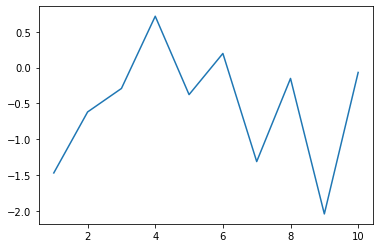

In [ ]:
import matplotlib.pyplot as plt

X = np.arange(1,11) # en nump
Y = np.random.normal(0,1,size=10)
plt.plot(X,Y)
plt.show() # visar plotten! obs, detta rensar .plt

*Mm, inte jättesnyggt kanske.* Men vi enkelt förbättra plotten!

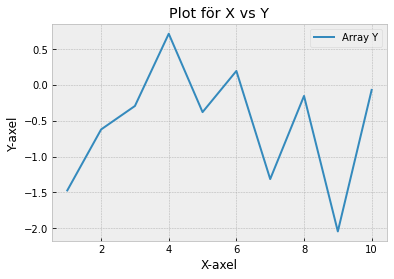

In [ ]:
plt.style.use('bmh') # byter tema
plt.plot(X,Y)
plt.xlabel("X-axel")
plt.ylabel("Y-axel")
plt.legend(['Array Y']) 
plt.title("Plot för X vs Y")
plt.show()

Matplotlib erbjuder hög flexibilitet för att rita grafer, men tyvärr går det och blir komplext väldigt fort för att få dessa möjligheter. *Men men*, biblioteket är väldigt användbart och eftersom många andra bibliotek för att visualisera data i Python är byggda från Matplotlib blir det ett måste. 

Det är väldigt viktigt att veta att Matplotlib har två sätt att rita diagram, antingen via `.plt` eller någonting som heter `.fig` & `.ax`. Väldigt viktigt att känna till då många guider på internet använder det ena och vissa det andra sättet för att rita sina diagram. Detta utan att nämna att det finns två olika metoder, vilket blir förvirrande för en nybörjare.

Vi rekommenderar följande källa för att få ett grepp om hur Matplotlib fungerar:

* [Giles McMullen-Klein guide till Matplotlib](https://www.youtube.com/watch?v=6rKe2IEIu8c)


## 2 Terminologi

**European Call Option** - (sv: *Europeisk köpoption*) Ett derivat som ger rättigheten att köpa en aktie för ett förutbestämt pris vid ett bestämt datum.

**Hedging** - Gardera sig mot ogynnsamma pris/kursutveckling genom att göra olika investeringar som helt eller delvis tar ut varandra vid vinst eller förlust.

**Arbritage** - En process där tillgångar säljs och köps för en riskfri vinst. 

**Kognitivt bias** - Snedvridningeffekt i hjärning som får oss att tänka irrationellt.

**Bekräftelsebias** - Kognitiv snedvridning som gör att vi noterar det som bekräftar det  vi redan tror på och bortser från det som talar emot det vi tror på.

**Volatilitet** - Ett mått på fluktuation hos en kurs. Ibland sedd som kortsiktigt risk.

**Derivat** - Ett finansiellt instrument vars värde beror på en underliggande tillgången

**Strike price** - Det förutbestämda priset för en tillgång i en option.

**Time to maturity**  - Tiden till slutdatum för en option.

**Riskneutral** - Att vikta vinster och förlust jämt. Människor är inte riskneutrala då vi värderar förluster mycket högre än vinst.

**Log-normalfördelning** - En statistisk fördelning som vi modellerar aktiepriset efter. $X \sim LN(\mu, \sigma) \Leftrightarrow \ln X \sim N(\mu,\sigma)$.  

**Validitet** - *se föreläsningsanteckningar ME1316.*

**Reliabilitet** - *se föreläsningsanteckningar ME1316.*

**Urvalsbias** - När informationen vi studerar inte är representativt för informationen som helhet. 

**Stickprov** - Ett mindre urval data ur ett stort dataset .


## 3 "Svar" till reflektionsfrågor

Se inte följande text som det absoluta, och entydiga, svaret till reflektionsfrågorna i kompendiet. Se det som exempel på tankegångar man skulle kunna ha när man svarar på frågorna. 

### Kapitel 2
 
1. Hur påverkar aktörers kognitiva bias marknaden och efficient market theoreom? 
 
*Kognitiv bias gör att en investerare inte tar helt rationella beslut trots att all information är tillgänglig. Den kognitiva bias som uppstår är förenligt med teori så till vida grad att den enskilda investeraren inte kommer att slå marknaden men oförenlig på det sättet att det då uppstår förtjänster/arbritagemöjligheter för andra investerare.*
 
2. Om nu market efficient hypothesis stämmer och att aktier styrs helt av slump och följer matematiken, varför har man då inte enbart automatiserade algoritmer som handlar?
 
*Automatiserade algoritmer kan endast ta hänsyn till information vi låter dem tillgå, mycket kvalitativ information om omständigheter kan vara svår att kodifiera.*

3. Vilka begränsningar kan du se med Black scholes-modellen? 

*Modellen är känslig för "tail-risk" och extremt slumpmässiga händelser. Den tar inte hänsyn till utdelningar eller transaktionskostnader. Modellen utgår ifrån en helt riskfri ränta, att volatiliten är konstant och att handeln av tillgångar sker i kontinurlig tid. Dessa 3 antaganden modellerar inte verkligheten till punkt och pricka*. 

### Kapitel 3
 
1. Hur långt i tiden bör vår historiska data gå tillbaka? Är den beroende på vår prognotiserade tidshorisont?
 
*... lagom? Går man inte tillräckligt långt tillbaka i tiden riskerar man att ha för få datapunkter. Går man för långt kan volatiliten ha ändrats av annat.*En bra tumregel är att ta med så mycket data som man ska prognostisera på. Med andra ord, om vi ska försöka uppskatta vad volatiliteten är om 2 år så ska historisk data på 2 år användas. Detta med anledning av att fånga in eventuella  “systematiska” komponenter.*
 
2. Vilken säsongsvariation kan finnas i vår data?
 
*Volatiliteten kan ändras när ny information släpps och eftersom företagens rapporter vanligtvis publiceras års- och kvartalsvis är det möjligt att volatiliteten ändras kring dessa punkter.*
 
3. Nu tittar vi på *metric data*, vilken typ av *non-metric data* kan man plocka in?
 
*Man kan söka upp mer information som kan ge mer insikt i datan. Har den underliggande aktien publicerat en kvartalsrapporten som vi bör ta hänsyn till?*
 
4. Bör vi ta med extrema och avvikande datapunkter i vår skattning? varför/varför inte?

*Extrema datapunker kan säga något om framtiden eftersom black swan-event, som coronapandemin, bidrar till den osäkerheten om framtiden och vad den väntar. Ett rimligt antagande är därför att volatiliten kommer att vara hög.*

5. Bör vi bearbeta datan för att få fram en bättre skattning på $\sigma$?

*Ja, det behöver vi. Våra modeller är inte bättre än datan som vi stoppar in i dem. Glöm inte; skit in, skit ut.*
 
6. Vilken bias kommer det få på vårt punktsattning $\hat{\sigma}$?
 
*Se 3.2.3 Modellering av bias.*

7. Kan du tänka dig en bättre modell av $\hat{\sigma}$?

*Mer allmän kan man se $\hat{\sigma}$ som en okänd funktion $f$ som är beroende på $\text{bias}$ och $\text{slump}$. Men detta gör det svårare att se $E[f(\sigma, \text{bias},\text{slump})]$.*
 
8. Varför tror du $\hat{\sigma}_{imp}<\hat{\sigma}_{hist}$? Gäller det alltid?

*Pågrund av det “säkerhetslager” som bankerna lägger på priset för optionen. Nej, om marknaden tror på en mer stabil kurs framöver där den historiska kursen har varit hög så gäller inte sambandet*
 
9. Hur kan vi bestämma ett konfidensintervall på $\hat{\sigma}_{imp}$?
 
*Ofta finns det information om var aktörer har placerat bud på optionen, men inte hittar någon köpare. Dessa kan bli gränser för intervallet.*
 
10. Varför behövs en kvantitativ analys av $\hat{\sigma}$ när vi kan ta den implicerade volatiliteten rakt av? 

*Den kvantitativa analysen behövs för att kunna se om historien kan säga något om framtiden.*

### Kapitel 4
 
1. Vilka antaganden bygger dessa modeller på?
 
*Att historien säger någonting om framtiden, och att den närmaste tiden har större betydelse.*
 
2. Hur hanterar man det prognosfel som uppstår? 
 
*Med en säkerhetsmarginal (konfidensintervall) och alltid utvärdera våra prognosverktyg.*
 
3. Finns det omständigheter när den viktade modellen är att föredra framför den statiska och vice versa? 

*Med en löptid som är kort så bör man använda en viktad modell för bättre precision.  En prognos på en längre tidshorisont, där mönstret i datan ser någorlunda konstant ut och med en data som följer en statistisk fördelning så fungerar den statiska bra.*